In [1]:
import os.path

import pandas as pd
import os
os.chdir('../')


In [2]:
from IDV_CS_Model import *
from CS_based_early_stopping import *
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
import numpy as np
from collections import Counter
import sys
import json
DATA_DIR = '../data/Evaluation_CoTs/Algo_Design_Data/'
# DF_NAME = 'GSM8K'
# DIFFICULTY = 'easy'
# NUM_OF_SAMPLES = 500
# NUM_OF_COT = 40
# MODEL = 'gpt-3.5-turbo-0125'

In [3]:
file_path = os.path.join(DATA_DIR, 'final_extracted.json')
df_with_features_raw = pd.read_json(file_path, lines=True)


In [4]:
feature_li =['LEN','QUA_IM','DIF_IV','SIM_INPUT','SIM_COT_BIGRAM']
df_with_features_raw = df_with_features_raw[~df_with_features_raw.Model.str.startswith('gpt-4')]

_,df_with_features = train_test_split_stratify(df_with_features_raw,test_size=0.3,random_state =2024)
_, coef = trained_LR_model(df_with_features_raw, feature_li, report_auroc=False,train_mode=True)
print(coef)
coe = coef[1:]
intercept = coef[0]

Train DataFrame:
Model
llama3_cleaned             2099
claude-3-haiku-20240307    2097
gpt-3.5-turbo-0125         2078
Name: count, dtype: int64
Name
GSM8K_test               1050
GSM8K_hard               1050
MathQA_challenge_test    1047
BigBench_hard            1047
MathQA_dev               1041
BigBench_easy            1039
Name: count, dtype: int64

Test DataFrame:
Model
claude-3-haiku-20240307    900
llama3_cleaned             900
gpt-3.5-turbo-0125         890
Name: count, dtype: int64
Name
BigBench_hard            450
GSM8K_hard               450
GSM8K_test               450
MathQA_challenge_test    448
MathQA_dev               447
BigBench_easy            445
Name: count, dtype: int64
Train DataFrame:
Model
llama3_cleaned             2099
claude-3-haiku-20240307    2097
gpt-3.5-turbo-0125         2078
Name: count, dtype: int64
Name
GSM8K_test               1050
GSM8K_hard               1050
MathQA_challenge_test    1047
BigBench_hard            1047
MathQA_dev               10

W:\anaconda3\envs\llm_hall_project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:               250960
Model:                          Logit   Df Residuals:                   250954
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 May 2024   Pseudo R-squ.:                  0.1598
Time:                        17:04:40   Log-Likelihood:            -1.4153e+05
converged:                      False   LL-Null:                   -1.6844e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5552      0.020    -79.240      0.000      -1.594      -1.517
LEN               -0.1650      0.009    -18.275      0.000      -0.183      -0.147
QUA_IM            -1.2273      0.065

In [5]:
df_with_features

,id,Name,Model,correct answer,CoT answers,Correctness,LEN,SIM_COT_BIGRAM,SIM_INPUT,DIF_IV,QUA_IM,SC_correctness,ES_correctness,ES_steps,asc_correctness,asc_steps
8112,8112,MathQA_challenge_test,gpt-3.5-turbo-0125,c,"[c, c, c, c, c, c, c, c, c, c, c, c, c, c, c, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 0.9615384615, 0.9615384615, 1.0, 0....","[0.3015873016, 0.3015873016, 0.3015873016, 0.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,5,1,4
4506,4506,BigBench_easy,gpt-3.5-turbo-0125,B,"[B, B, B, B, B, error, B, B, B, B, B, error, B...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...","[0.0, 0.8148148148000001, 0.9183673469, 0.8490...","[0.2537313433, 0.2786885246, 0.2903225806, 0.2...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,5,1,4
6701,6701,MathQA_dev,claude-3-haiku-20240307,c,"[c, c, c, c, c, e, c, c, c, c, c, c, c, c, c, ...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[0.0, 0.5050505051, 0.6024096386000001, 0.6835...","[0.2584269663, 0.3289473684, 0.3150684932, 0.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,5,1,4
4921,4921,BigBench_hard,gpt-3.5-turbo-0125,C,"[B, B, B, B, B, B, B, B, B, B, B, B, B, B, B, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.6428571429000001, 0.4117647059, 0.4736...","[0.3387096774, 0.328125, 0.23529411760000002, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,5,0,4
3638,3638,BigBench_easy,claude-3-haiku-20240307,A,"[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[0.0, 0.3650793651, 0.36571428570000003, 0.331...","[0.1956521739, 0.20800000000000002, 0.24786324...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6588,6588,MathQA_dev,claude-3-haiku-20240307,c,"[c, e, c, c, c, c, c, c, c, c, c, c, a, c, c, ...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...","[0.0, 0.5446428571, 0.5321100917, 0.6534653465...","[0.4036697248, 0.4018691589, 0.53125, 0.5, 0.4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,7,1,7
6960,6960,MathQA_challenge_test,claude-3-haiku-20240307,b,"[b, b, d, b, b, b, b, b, b, b, b, b, d, b, d, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, ...","[1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, ...","[0.0, 0.5268817204, 0.661971831, 0.5802469136,...","[0.3516483516, 0.3125, 0.3378378378, 0.3690476...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,8,1,7
3015,3015,GSM8K_hard,llama3_cleaned,5.0,"[5.0, 1.0, 5.0, 2.0, 5.0, 5.0, 5.0, 3.0, 6.0, ...","[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[0.0, 0.5, 0.593220339, 0.6016949153000001, 0....","[0.26363636360000003, 0.21904761900000003, 0.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,40,1,18
2917,2917,GSM8K_hard,llama3_cleaned,4083344.0,"[4083344.0, 4083674.0, 4083344.0, 4083344.0, 4...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.0, 0.53, 0.59, 0.7108433735, 0.8051948052, ...","[0.3116883117, 0.3571428571, 0.3544303797, 0.4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [20]:
config = {
    'benchmark': ['all','GSM8K_hard','GSM8K_test','MathQA_challenge_test','MathQA_dev','BigBench_hard','BigBench_easy'],
    'llm' : ['all','gpt-3.5','claude-3','llama3'],
    'N': [i for i in range(2,16)],
    'threshold': [0.1*i for i in range(11)],
    'stop_algo':['PositiveN','ConsistencyN'],
    'approximator': [customized_LR_model,trained_LR_model]
}

In [21]:
def get_data(df,benchmark='all',llm = 'all'):
    if benchmark == 'all':
        df_ = df
    else:
        df_ = df[df.Name == benchmark]
    
    if llm == 'gpt-4':
        df_final = df_[df_.Model.str.startswith('gpt-4')]
    elif llm == 'gpt-3.5':
        df_final = df_[df_.Model.str.startswith('gpt-3')]
    elif llm == 'claude-3':
        df_final = df_[df_.Model.str.startswith('claude-3')]
    elif llm == 'llama3':
        df_final = df_[df_.Model.str.startswith('llama3')]
    else:
        df_final = df_
    return df_final

In [22]:
for benchmark in config['benchmark']:
    print(len(get_data(df_with_features,benchmark=benchmark)))

2690
450
450
448
447
450
445


# step vs acc main

In [27]:
result_buffer = {
        'llm': [],
        'benchmark':[],
        'N': [],
        'stop_algo':[],
        'threshold': [],
        'SC_ACC': [],
        'ES_ACC': [],
        'ASC_ACC': [],
        'CASC_ACC': [],
        'SC_Avg_Cost': [],
        'ES_Avg_Cost': [],
        'ASC_Avg_Cost': [],
        'CASC_Avg_Cost': [],
    }
for benchmark in config['benchmark']:
    for llm in config['llm']:
        df_in = get_data(df_with_features,benchmark=benchmark,llm=llm)
        print(llm,benchmark)
        print('df_size is ',len(df_in))
        df_cs = customized_LR_model(df_in,feature_li,coe,intercept)
        N = 5
        threshold = 0.1
        stop_mechanism = 'PositiveN'
        df_results = CS_early_stopping(df=df_cs, threshold=threshold, N=N, stop_mechanism=stop_mechanism)
        df_model_comp_dict = {
                'llm': llm,
                'benchmark':benchmark,
                'N': N,
                'stop_algo':stop_mechanism,
                'threshold': threshold,
                'SC_ACC': round(df_results.SC_correctness.sum() / len(df_results),4),
                'ES_ACC': round(df_results.ES_correctness.sum() / len(df_results),4),
                'ASC_ACC': round(df_results.asc_correctness.sum() / len(df_results),4),
                'CASC_ACC': round(df_results.CS_correctness.sum() / len(df_results),4),
                'SC_Avg_Cost': 40,
                'ES_Avg_Cost': round(df_results.ES_steps.mean(),2),
                'ASC_Avg_Cost': round(df_results.asc_steps.mean(),2),
                'CASC_Avg_Cost': round(df_results.CS_steps.mean(),2),
            }
        for key,val in df_model_comp_dict.items():
            result_buffer[key].append(val)

all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.462453531598513
SC_Avg_Steps : 40
ES_Avg_Steps : 32.73197026022305
CS_Avg_Steps : 8.624163568773234
ASC_Avg_Steps : 40.0
ASC_ACC : 0.42862453531598516
gpt-3.5 all
df_size is  890


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.5393258426966292
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 8.23932584269663
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.5433333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 6.587777777777778
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.3055555555555556
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 11.04111111111111
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all GSM8K_hard
df_size is  450
SC_ACC : 0.3711111111111111
ES_ACC : 0.3711111111111111
CS_ACC : 0.35777777777777775
SC_Avg_Steps : 40
ES_Avg_Steps : 35.80888888888889
CS_Avg_Steps : 5.7155555555555555
ASC_Avg_Steps : 40.0
ASC_ACC : 0.3711111111111111
gpt-3.5 GSM8K_hard
df_size is  150


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.42
ES_ACC : 0.42
CS_ACC : 0.42
SC_Avg_Steps : 40
ES_Avg_Steps : 35.42
CS_Avg_Steps : 6.773333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.42
claude-3 GSM8K_hard
df_size is  150
SC_ACC : 0.44
ES_ACC : 0.44
CS_ACC : 0.41333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 33.92
CS_Avg_Steps : 5.32
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44
llama3 GSM8K_hard
df_size is  150
SC_ACC : 0.25333333333333335
ES_ACC : 0.25333333333333335
CS_ACC : 0.24
SC_Avg_Steps : 40
ES_Avg_Steps : 38.086666666666666
CS_Avg_Steps : 5.053333333333334
ASC_Avg_Steps : 40.0
ASC_ACC : 0.25333333333333335
all GSM8K_test
df_size is  450


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.8066666666666666
ES_ACC : 0.8066666666666666
CS_ACC : 0.7933333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 29.41111111111111
CS_Avg_Steps : 5.1755555555555555
ASC_Avg_Steps : 40.0
ASC_ACC : 0.8066666666666666
gpt-3.5 GSM8K_test
df_size is  150
SC_ACC : 0.8333333333333334
ES_ACC : 0.8333333333333334
CS_ACC : 0.8
SC_Avg_Steps : 40
ES_Avg_Steps : 28.80666666666667
CS_Avg_Steps : 5.246666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.8333333333333334
claude-3 GSM8K_test
df_size is  150
SC_ACC : 0.84
ES_ACC : 0.84
CS_ACC : 0.86
SC_Avg_Steps : 40
ES_Avg_Steps : 27.893333333333334
CS_Avg_Steps : 5.28
ASC_Avg_Steps : 40.0
ASC_ACC : 0.84
llama3 GSM8K_test
df_size is  150
SC_ACC : 0.7466666666666667
ES_ACC : 0.7466666666666667
CS_ACC : 0.72
SC_Avg_Steps : 40
ES_Avg_Steps : 31.533333333333335
CS_Avg_Steps : 5.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.7466666666666667
all MathQA_challenge_test
df_size is  448
SC_ACC : 0.3861607142857143
ES_ACC : 0.3861607142857143
CS_ACC : 0.41964285714285715
SC_Av

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.527027027027027
ES_ACC : 0.527027027027027
CS_ACC : 0.6148648648648649
SC_Avg_Steps : 40
ES_Avg_Steps : 33.689189189189186
CS_Avg_Steps : 10.52027027027027
ASC_Avg_Steps : 40.0
ASC_ACC : 0.527027027027027
claude-3 MathQA_challenge_test
df_size is  150
SC_ACC : 0.56
ES_ACC : 0.56
CS_ACC : 0.5333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 32.20666666666666
CS_Avg_Steps : 10.033333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.56
llama3 MathQA_challenge_test
df_size is  150
SC_ACC : 0.07333333333333333
ES_ACC : 0.07333333333333333
CS_ACC : 0.11333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 32.48
CS_Avg_Steps : 10.813333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.07333333333333333
all MathQA_dev
df_size is  447


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.3959731543624161
ES_ACC : 0.3959731543624161
CS_ACC : 0.4250559284116331
SC_Avg_Steps : 40
ES_Avg_Steps : 32.28635346756152
CS_Avg_Steps : 9.438478747203579
ASC_Avg_Steps : 40.0
ASC_ACC : 0.3959731543624161
gpt-3.5 MathQA_dev
df_size is  147
SC_ACC : 0.4421768707482993
ES_ACC : 0.4421768707482993
CS_ACC : 0.4897959183673469
SC_Avg_Steps : 40
ES_Avg_Steps : 32.965986394557824
CS_Avg_Steps : 11.122448979591837
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4421768707482993
claude-3 MathQA_dev
df_size is  150
SC_ACC : 0.58
ES_ACC : 0.58
CS_ACC : 0.6066666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 31.653333333333332
CS_Avg_Steps : 8.866666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.58
llama3 MathQA_dev
df_size is  150
SC_ACC : 0.16666666666666666
ES_ACC : 0.16666666666666666
CS_ACC : 0.18
SC_Avg_Steps : 40
ES_Avg_Steps : 32.25333333333333
CS_Avg_Steps : 8.36
ASC_Avg_Steps : 40.0
ASC_ACC : 0.16666666666666666
all BigBench_hard
df_size is  450


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.4311111111111111
ES_ACC : 0.4311111111111111
CS_ACC : 0.5155555555555555
SC_Avg_Steps : 40
ES_Avg_Steps : 33.07333333333333
CS_Avg_Steps : 10.795555555555556
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4311111111111111
gpt-3.5 BigBench_hard
df_size is  150
SC_ACC : 0.5533333333333333
ES_ACC : 0.5533333333333333
CS_ACC : 0.62
SC_Avg_Steps : 40
ES_Avg_Steps : 31.69333333333333
CS_Avg_Steps : 8.04
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5533333333333333
claude-3 BigBench_hard
df_size is  150
SC_ACC : 0.6733333333333333
ES_ACC : 0.6733333333333333
CS_ACC : 0.64
SC_Avg_Steps : 40
ES_Avg_Steps : 31.36
CS_Avg_Steps : 5.026666666666666
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6733333333333333
llama3 BigBench_hard
df_size is  150
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.2866666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 36.166666666666664
CS_Avg_Steps : 19.32
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all BigBench_easy
df_size is  445


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.17752808988764046
ES_ACC : 0.17752808988764046
CS_ACC : 0.2606741573033708
SC_Avg_Steps : 40
ES_Avg_Steps : 33.024719101123594
CS_Avg_Steps : 10.195505617977528
ASC_Avg_Steps : 40.0
ASC_ACC : 0.17752808988764046
gpt-3.5 BigBench_easy
df_size is  145
SC_ACC : 0.25517241379310346
ES_ACC : 0.25517241379310346
CS_ACC : 0.2827586206896552
SC_Avg_Steps : 40
ES_Avg_Steps : 33.358620689655176
CS_Avg_Steps : 7.8068965517241375
ASC_Avg_Steps : 40.0
ASC_ACC : 0.25517241379310346
claude-3 BigBench_easy
df_size is  150
SC_ACC : 0.21333333333333335
ES_ACC : 0.21333333333333335
CS_ACC : 0.20666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 29.953333333333333
CS_Avg_Steps : 5.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.21333333333333335
llama3 BigBench_easy
df_size is  150
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.29333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 35.77333333333333
CS_Avg_Steps : 17.7
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667


In [28]:
df_main_table = pd.DataFrame(result_buffer)
# df_main_table.to_csv('main_table.csv',index=False)
# df_main_table = pd.read_csv('../src/experiment_collection/main_table.csv')
df_main_table

,llm,benchmark,N,stop_algo,threshold,SC_ACC,ES_ACC,ASC_ACC,CASC_ACC,SC_Avg_Cost,ES_Avg_Cost,ASC_Avg_Cost,CASC_Avg_Cost
0,all,all,5,PositiveN,0.1,0.4286,0.4286,0.4286,0.4625,40,32.73,40.0,8.62
1,gpt-3.5,all,5,PositiveN,0.1,0.5067,0.5067,0.5067,0.5393,40,32.65,40.0,8.24
2,claude-3,all,5,PositiveN,0.1,0.5511,0.5511,0.5511,0.5433,40,31.16,40.0,6.59
3,llama3,all,5,PositiveN,0.1,0.2289,0.2289,0.2289,0.3056,40,34.38,40.0,11.04
4,all,GSM8K_hard,5,PositiveN,0.1,0.3711,0.3711,0.3711,0.3578,40,35.81,40.0,5.72
5,gpt-3.5,GSM8K_hard,5,PositiveN,0.1,0.4200,0.4200,0.4200,0.4200,40,35.42,40.0,6.77
6,claude-3,GSM8K_hard,5,PositiveN,0.1,0.4400,0.4400,0.4400,0.4133,40,33.92,40.0,5.32
7,llama3,GSM8K_hard,5,PositiveN,0.1,0.2533,0.2533,0.2533,0.2400,40,38.09,40.0,5.05
8,all,GSM8K_test,5,PositiveN,0.1,0.8067,0.8067,0.8067,0.7933,40,29.41,40.0,5.18
9,gpt-3.5,GSM8K_test,5,PositiveN,0.1,0.8333,0.8333,0.8333,0.8000,40,28.81,40.0,5.25


# N study

In [10]:
result_buffer = {
        'llm': [],
        'benchmark':[],
        'N': [],
        'stop_algo':[],
        'threshold': [],
        'SC_ACC': [],
        'ES_ACC': [],
        'ASC_ACC': [],
        'CASC_ACC': [],
        'SC_Avg_Cost': [],
        'ES_Avg_Cost': [],
        'ASC_Avg_Cost': [],
        'CASC_Avg_Cost': [],
    }
for N in config['N']:
    for benchmark in config['benchmark']:
        for llm in config['llm']:
            df_in = get_data(df_with_features,benchmark=benchmark,llm=llm)
            print(llm,benchmark)
            print('df_size is ',len(df_in))
            df_cs = customized_LR_model(df_in,feature_li,coe,intercept)
            threshold = 0.2
            stop_mechanism = 'PositiveN'
            df_results = CS_early_stopping(df=df_cs, threshold=threshold, N=N, stop_mechanism=stop_mechanism)
            df_model_comp_dict = {
                    'llm': llm,
                    'benchmark':benchmark,
                    'N': N,
                    'stop_algo':stop_mechanism,
                    'threshold': threshold,
                    'SC_ACC': round(df_results.SC_correctness.sum() / len(df_results),4),
                    'ES_ACC': round(df_results.ES_correctness.sum() / len(df_results),4),
                    'ASC_ACC': round(df_results.asc_correctness.sum() / len(df_results),4),
                    'CASC_ACC': round(df_results.CS_correctness.sum() / len(df_results),4),
                    'SC_Avg_Cost': 40,
                    'ES_Avg_Cost': round(df_results.ES_steps.mean(),2),
                    'ASC_Avg_Cost': round(df_results.asc_steps.mean(),2),
                    'CASC_Avg_Cost': round(df_results.CS_steps.mean(),2),
                }
            for key,val in df_model_comp_dict.items():
                result_buffer[key].append(val)
df_N_study = pd.DataFrame(result_buffer)
# df_N_study.to_csv('N_study_table.csv',index=False)

all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.4267657992565056
CS_ACC : 0.4423791821561338
SC_Avg_Steps : 40
ES_Avg_Steps : 15.74721189591078
CS_Avg_Steps : 4.41449814126394
ASC_Avg_Steps : 13.399256505576208
ASC_ACC : 0.42973977695167287
gpt-3.5 all
df_size is  890


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5202247191011236
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 4.202247191011236
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5133333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 3.5744444444444445
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.29444444444444445
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 5.464444444444444
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5277777777777778
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 2.3155555555555556
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.5866666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 2.5933333333333333
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.59
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 2.276666666666667
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.4066666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 2.0766666666666667
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.3865921787709497
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 4.5374301675977655
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.4576271186440678
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 3.4135593220338984
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.4066666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 2.0233333333333334
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.2966666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 8.156666666666666
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4122905027932961
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 6.402234636871508
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5152542372881356
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 6.627118644067797
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5433333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 6.423333333333333
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.18
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 6.16
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0.42862453531598516

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5426966292134832
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 5.6359550561797755
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5322222222222223
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 4.581111111111111
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.31444444444444447
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 7.458888888888889
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.56
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 3.4066666666666667
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.6
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 3.8233333333333333
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.6166666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 3.29
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.4633333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 3.1066666666666665
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.4033519553072626
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 6.670391061452514
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.4745762711864407
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 5.125423728813559
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.42
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 3.0233333333333334
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.31666666666666665
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 11.836666666666666
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all 

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4245810055865922
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 7.615642458100559
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5525423728813559
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 7.989830508474577
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.56
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 7.43
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.16333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 7.433333333333334
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0.4286245353159851

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5404494382022472
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 6.920224719101124
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.53
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 5.5777777777777775
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.31777777777777777
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 9.362222222222222
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5722222222222222
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 4.446666666666666
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.61
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 4.92
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.6266666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 4.293333333333333
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.48
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 4.126666666666667
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.4
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 8.621229050279329
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.46440677966101696
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 6.505084745762712
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.42
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 4.023333333333333
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.31666666666666665
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 15.3
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4145251396648045
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 8.812290502793296
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5457627118644067
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 9.36949152542373
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5433333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 8.416666666666666
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15666666666666668
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 8.66
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0.428

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5382022471910113
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 8.25505617977528
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5444444444444444
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 6.598888888888889
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.30666666666666664
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 11.152222222222223
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5766666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 5.501111111111111
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.6133333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 6.043333333333333
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.64
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 5.303333333333334
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.4766666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 5.156666666666666
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.39106145251396646
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 10.53072625698324
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.4576271186440678
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 7.935593220338983
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.42333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 5.033333333333333
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.29333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 18.58
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
al

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4201117318435754
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 9.996648044692737
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5423728813559322
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 10.823728813559322
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.57
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 9.46
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 9.72
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42676579925650

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5404494382022472
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 9.53370786516854
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5388888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 7.607777777777778
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.3111111111111111
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 12.741111111111111
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5822222222222222
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 6.556666666666667
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.6233333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 7.16
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.6333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 6.32
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.49
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 6.19
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.3888268156424581
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 12.206703910614525
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.4576271186440678
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 9.359322033898305
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.4166666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 6.033333333333333
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.29333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 21.18
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.41787709497206704
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 11.143016759776536
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5389830508474577
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 12.122033898305085
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 10.47
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 10.853333333333333
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0.428624535315

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5393258426966292
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 10.733707865168538
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5466666666666666
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 8.604444444444445
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.31777777777777777
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 14.245555555555555
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5788888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 7.584444444444444
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.6133333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 8.226666666666667
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.64
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 7.323333333333333
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.48333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 7.203333333333333
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.4
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 13.817877094972067
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.4711864406779661
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 10.766101694915255
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.4166666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 7.043333333333333
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.31333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 23.593333333333334
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all 

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.423463687150838
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 12.206703910614525
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5322033898305085
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 13.250847457627119
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5833333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 11.446666666666667
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15666666666666668
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 11.94
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5370786516853933
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 11.939325842696629
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5411111111111111
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 9.584444444444445
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.31333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 15.505555555555556
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.58
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 8.633333333333333
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.6133333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 9.35
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.6333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 8.326666666666666
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.49333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 8.223333333333333
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.39106145251396646
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 15.198882681564246
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.4711864406779661
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 12.135593220338983
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.4166666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 8.05
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.2866666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 25.36
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all mathqa
df_s

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.41899441340782123
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 13.222346368715083
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5254237288135594
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 14.376271186440677
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5733333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 12.376666666666667
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.16
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 12.933333333333334
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5426966292134832
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 13.11685393258427
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5433333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 10.575555555555555
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.31777777777777777
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 16.641111111111112
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5844444444444444
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 9.683333333333334
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.62
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 10.45
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.6366666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 9.343333333333334
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.49666666666666665
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 9.256666666666666
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.39776536312849164
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 16.427932960893855
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.4711864406779661
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 13.464406779661017
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.42
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 9.053333333333333
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.30333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 26.716666666666665
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
al

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4201117318435754
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 14.246927374301675
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.535593220338983
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 15.48135593220339
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5733333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 13.33
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15333333333333332
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 13.95
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0.4286245353159

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5426966292134832
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 14.248314606741573
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5477777777777778
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 11.571111111111112
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.3211111111111111
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 17.70888888888889
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5866666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 10.742222222222223
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.6266666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 11.56
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.64
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 10.373333333333333
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.49333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 10.293333333333333
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.4011173184357542
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 17.574301675977654
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.46779661016949153
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 14.667796610169491
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.4166666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 10.06
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.32
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 27.946666666666665
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all mathqa
df_s

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4223463687150838
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 15.235754189944133
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5322033898305085
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 16.56271186440678
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5866666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 14.28
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 14.886666666666667
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0.42862453531598

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5426966292134832
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 15.379775280898876
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5455555555555556
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 12.557777777777778
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.3244444444444444
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 18.723333333333333
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.59
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 11.78888888888889
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.6233333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 12.676666666666666
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.64
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 11.376666666666667
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.5066666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 11.313333333333333
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.39553072625698327
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 18.664804469273744
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.46440677966101696
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 15.871186440677967
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.41333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 11.07
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.31
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 29.006666666666668
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all mathqa
df

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.42569832402234636
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 16.230167597765362
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5389830508474577
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 17.63728813559322
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5833333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 15.226666666666667
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15666666666666668
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 15.85
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5483146067415731
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 16.470786516853934
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5488888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 13.544444444444444
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.3233333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 19.724444444444444
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5955555555555555
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 12.834444444444445
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.6366666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 13.783333333333333
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.6433333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 12.39
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.5066666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 12.33
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.39664804469273746
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 19.711731843575418
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.4610169491525424
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 16.9864406779661
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.42
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 12.073333333333334
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.31
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 30.03
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.42681564245810055
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 17.215642458100557
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5457627118644067
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 18.688135593220338
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5833333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 16.17
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15333333333333332
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 16.813333333333333
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC :

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.549438202247191
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 17.573033707865168
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5455555555555556
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 14.524444444444445
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.32555555555555554
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 20.715555555555557
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5966666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 13.874444444444444
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.63
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 14.863333333333333
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.6466666666666666
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 13.406666666666666
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.5133333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 13.353333333333333
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.394413407821229
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 20.785474860335196
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.46440677966101696
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 18.19322033898305
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.4066666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 13.076666666666666
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.31333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 31.043333333333333
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.0666666

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.42793296089385474
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 18.174301675977652
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5525423728813559
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 19.708474576271186
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.5833333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 17.09
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 17.75
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC 

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5528089887640449
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 18.620224719101124
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5544444444444444
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 15.516666666666667
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.32222222222222224
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 21.657777777777778
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.5988888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 14.904444444444444
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.64
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 15.91
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.6466666666666666
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 14.433333333333334
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.51
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 14.37
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.4011173184357542
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 21.76312849162011
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.46779661016949153
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 19.240677966101696
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.4266666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 14.083333333333334
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.31
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 31.923333333333332
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.42793296089385474
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 19.147486033519552
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5491525423728814
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 20.75593220338983
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.59
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 18.033333333333335
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.14666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 18.68
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334
all all
df_size is  2690
SC_ACC : 0.428624535315

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.503370786516854
CS_ACC : 0.5550561797752809
SC_Avg_Steps : 40
ES_Avg_Steps : 16.6438202247191
CS_Avg_Steps : 19.65505617977528
ASC_Avg_Steps : 14.193258426966292
ASC_ACC : 0.5056179775280899
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5488888888888889
CS_ACC : 0.5511111111111111
SC_Avg_Steps : 40
ES_Avg_Steps : 14.057777777777778
CS_Avg_Steps : 16.502222222222223
ASC_Avg_Steps : 12.092222222222222
ASC_ACC : 0.5555555555555556
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.32555555555555554
SC_Avg_Steps : 40
ES_Avg_Steps : 16.55
CS_Avg_Steps : 22.56111111111111
ASC_Avg_Steps : 13.921111111111111
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5922222222222222
CS_ACC : 0.6011111111111112
SC_Avg_Steps : 40
ES_Avg_Steps : 18.413333333333334
CS_Avg_Steps : 15.926666666666666
ASC_Avg_Steps : 15.198888888888888
ASC_ACC : 0.5877777777777777
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6333333333333333
CS_ACC : 0.6433333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 18.073333333333334
CS_Avg_Steps : 16.953333333333333
ASC_Avg_Steps : 14.943333333333333
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.6466666666666666
CS_ACC : 0.64
SC_Avg_Steps : 40
ES_Avg_Steps : 14.363333333333333
CS_Avg_Steps : 15.43
ASC_Avg_Steps : 11.543333333333333
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.49666666666666665
CS_ACC : 0.52
SC_Avg_Steps : 40
ES_Avg_Steps : 22.803333333333335
CS_Avg_Steps : 15.396666666666667
ASC_Avg_Steps : 19.11
ASC_ACC : 0.49666666666666665
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.29608938547486036
CS_ACC : 0.39888268156424583
SC_Avg_Steps : 40
ES_Avg_Steps : 13.818994413407822
CS_Avg_Steps : 22.687150837988828
ASC_Avg_Steps : 12.232402234636872
ASC_ACC : 0.3039106145251397
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.39322033898305087
CS_ACC : 0.46779661016949153
SC_Avg_Steps : 40
ES_Avg_Steps : 13.837288135593221
CS_Avg_Steps : 20.311864406779662
ASC_Avg_Steps : 12.257627118644068
ASC_ACC : 0.4
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.43333333333333335
CS_ACC : 0.42333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 11.506666666666666
CS_Avg_Steps : 15.09
ASC_Avg_Steps : 10.766666666666667
ASC_ACC : 0.44666666666666666
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06333333333333334
CS_ACC : 0.30666666666666664
SC_Avg_Steps : 40
ES_Avg_Steps : 16.113333333333333
CS_Avg_Steps : 32.62
ASC_Avg_Steps : 13.673333333333334
ASC_ACC : 0.06666666666666667
all mathqa


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4301675977653631
SC_Avg_Steps : 40
ES_Avg_Steps : 14.994413407821229
CS_Avg_Steps : 20.124022346368715
ASC_Avg_Steps : 12.756424581005586
ASC_ACC : 0.39664804469273746
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.48135593220338985
CS_ACC : 0.5525423728813559
SC_Avg_Steps : 40
ES_Avg_Steps : 17.996610169491525
CS_Avg_Steps : 21.74576271186441
ASC_Avg_Steps : 15.366101694915255
ASC_ACC : 0.488135593220339
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.5666666666666667
CS_ACC : 0.59
SC_Avg_Steps : 40
ES_Avg_Steps : 16.303333333333335
CS_Avg_Steps : 18.986666666666668
ASC_Avg_Steps : 13.966666666666667
ASC_ACC : 0.58
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12666666666666668
CS_ACC : 0.15
SC_Avg_Steps : 40
ES_Avg_Steps : 10.733333333333333
CS_Avg_Steps : 19.666666666666668
ASC_Avg_Steps : 8.98
ASC_ACC : 0.12333333333333334


In [11]:
# df_N_study = pd.read_csv('../src/experiment_collection/N_study_table.csv')
df_N_study

,llm,benchmark,N,stop_algo,threshold,SC_ACC,ES_ACC,ASC_ACC,CASC_ACC,SC_Avg_Cost,ES_Avg_Cost,ASC_Avg_Cost,CASC_Avg_Cost
0,all,all,2,PositiveN,0.2,0.4286,0.4268,0.4297,0.4424,40,15.75,13.40,4.41
1,gpt-3.5,all,2,PositiveN,0.2,0.5067,0.5034,0.5056,0.5202,40,16.64,14.19,4.20
2,claude-3,all,2,PositiveN,0.2,0.5511,0.5489,0.5556,0.5133,40,14.06,12.09,3.57
3,llama3,all,2,PositiveN,0.2,0.2289,0.2289,0.2289,0.2944,40,16.55,13.92,5.46
4,all,gsm,2,PositiveN,0.2,0.5889,0.5922,0.5878,0.5278,40,18.41,15.20,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,llama3,bb,15,PositiveN,0.2,0.0667,0.0633,0.0667,0.3067,40,16.11,13.67,32.62
220,all,mathqa,15,PositiveN,0.2,0.3911,0.3911,0.3966,0.4302,40,14.99,12.76,20.12
221,gpt-3.5,mathqa,15,PositiveN,0.2,0.4847,0.4814,0.4881,0.5525,40,18.00,15.37,21.75
222,claude-3,mathqa,15,PositiveN,0.2,0.5700,0.5667,0.5800,0.5900,40,16.30,13.97,18.99


In [12]:
def replace_zeros_with_previous_nonzero(initialize, arr):
    # Initialize a variable to keep track of the last non-zero value
    last_nonzero = initialize
    
    # Iterate over the array
    for i in range(len(arr)):
        if arr[i] != 0:
            # Update the last non-zero value
            last_nonzero = arr[i]
        else:
            # Replace zero with the last non-zero value
            arr[i] = last_nonzero
            
    return arr
# Create the line plot with solid lines


all all


[]

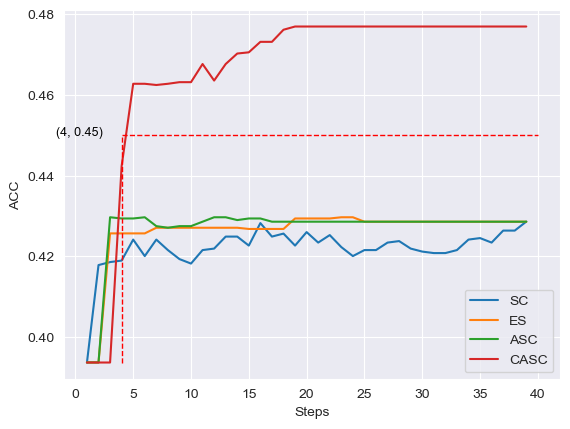

In [13]:
llm = 'all'
benchmark = 'all'
print(llm,benchmark)
sc_step_results = []
df_step = get_data(df_with_features,benchmark=benchmark,llm = llm)
for row_idx in range(len(df_step)):
    sample_results = []
    for i in range(40):
        if Counter(df_step['CoT answers'].iloc[row_idx][:i+1]).most_common(1)[0][0] == df_step['correct answer'].iloc[row_idx]:
            sample_results.append(1)
        else:
            sample_results.append(0)
    sc_step_results.append(sample_results)
sc_step_results = np.array(sc_step_results)
sc_step_results = sc_step_results.sum(axis=0)/sc_step_results.shape[0]
df_N_study_gpt4 = df_N_study[(df_N_study.llm == llm)]
df_N_study_gpt4_all = df_N_study_gpt4[df_N_study_gpt4.benchmark == benchmark]
casc_steps = df_N_study_gpt4_all['CASC_Avg_Cost'].to_numpy().astype(np.int32)
casc_acc = df_N_study_gpt4_all['CASC_ACC'].to_numpy()
casc_step_results = np.zeros(40)
for i, idx in enumerate(casc_steps):
    casc_step_results[idx] = casc_acc[i]
casc_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],casc_step_results)

es_steps = []
es_acc = []
for i in range(16):
    df_es_step = calculate_ES_correctness(df_step,i+1)
    es_acc.append(round(df_es_step.ES_correctness.sum() / len(df_es_step),4))
    es_steps.append(df_es_step.ES_steps.mean().astype(np.int32))
es_step_results = np.zeros(40)
for i, idx in enumerate(es_steps):
    es_step_results[idx] = es_acc[i]
es_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],es_step_results)

asc_steps = []
asc_acc = []
for i in range(75,101):
    df_asc_step = calculate_ASC_correctness(df_step,i*0.01)
    asc_acc.append(round(df_asc_step.asc_correctness.sum() / len(df_asc_step),4))
    asc_steps.append(df_asc_step.asc_steps.mean().astype(np.int32))
asc_step_results = np.zeros(40)
for i, idx in enumerate(asc_steps):
    asc_step_results[idx-1] = asc_acc[i]
asc_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],asc_step_results)

step_study_plot_dict = {
    'Steps': np.arange(40)[1:],
    'SC': sc_step_results[1:],
    'ES': es_step_results[1:],
    'ASC': asc_step_results[1:],
    'CASC':casc_step_results[1:]
}



plt.figure()
sns.lineplot(data=step_study_plot_dict, x='Steps', y='SC', label='SC', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='ES', label='ES', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='ASC', label='ASC', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='CASC', label='CASC', linestyle='-')

# Set the x and y axis labels
plt.xlabel('Steps')
plt.ylabel('ACC')

# Find the intersection point
x_intercept = None
for i in range(len(step_study_plot_dict['Steps']) - 1):
    if step_study_plot_dict['CASC'][i] < sc_step_results.max() <= step_study_plot_dict['CASC'][i+1]:
        x_intercept = step_study_plot_dict['Steps'][i]+1
        break

# Add the horizontal line (red line)
plt.hlines(y=0.45, xmin=x_intercept, xmax=40, color='red', linestyle='--', linewidth=1)

# Add the vertical line at the intersection point
if x_intercept is not None:
    plt.vlines(x=x_intercept, ymin=sc_step_results.min(), ymax=0.45, color='red', linestyle='--', linewidth=1)
    plt.annotate(f'({x_intercept}, {0.45})', xy=(x_intercept, 0.45), 
                 xytext=(x_intercept - 5.7, 0.45),
                 fontsize=9, color='black')

# Display the plot
plt.legend()
plt.savefig('../src/experiment_collection/main_step_acc_plot.jpg', dpi=300, bbox_inches='tight')
plt.plot()

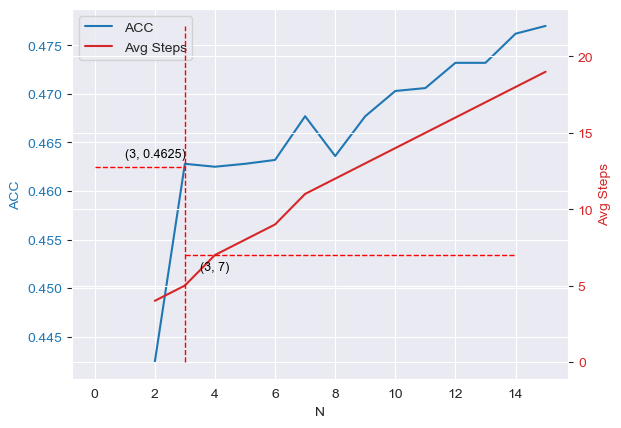

In [14]:
casc_N = df_N_study_gpt4_all['N'].to_numpy()
fig, ax1 = plt.subplots()

# Plot the first line (ACC) with ax1
color = 'tab:blue'
ax1.set_xlabel('N')
ax1.set_ylabel('ACC', color=color)
line1, = ax1.plot(casc_N, casc_acc, color=color, label='ACC')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(y=casc_acc[2], xmin=0, xmax=3, color='red', linestyle='--', linewidth=1)
plt.annotate(f'({3}, {casc_acc[2]})', xy=(3, casc_acc[2]), 
                 xytext=(3 - 2, casc_acc[2]+0.001),
                 fontsize=9, color='black')
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Steps', color=color)
line2, = ax2.plot(casc_N, casc_steps, color=color, label='Avg Steps')
ax2.tick_params(axis='y', labelcolor=color)
plt.vlines(x=3, ymin=0, ymax=22, color='red', linestyle='--', linewidth=1)
plt.hlines(y=casc_steps[2], xmin=3, xmax=14, color='red', linestyle='--', linewidth=1)
plt.annotate(f'({3}, {casc_steps[2]})', xy=(3, casc_steps[2]), 
                 xytext=(3 +0.5, casc_steps[2]-1),
                 fontsize=9, color='black')
# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
fig.savefig('../src/experiment_collection/N_study_plot.jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Threshold Study

In [15]:
result_buffer = {
        'llm': [],
        'benchmark':[],
        'N': [],
        'stop_algo':[],
        'threshold': [],
        'SC_ACC': [],
        'ES_ACC': [],
        'ASC_ACC': [],
        'CASC_ACC': [],
        'SC_Avg_Cost': [],
        'ES_Avg_Cost': [],
        'ASC_Avg_Cost': [],
        'CASC_Avg_Cost': [],
    }
for threshold in config['threshold']:
    for benchmark in config['benchmark']:
        for llm in config['llm']:
            df_in = get_data(df_with_features,benchmark=benchmark,llm=llm)
            print(llm,benchmark)
            print('df_size is ',len(df_in))
            df_cs = customized_LR_model(df_in,feature_li,coe,intercept)
            N= 3
            stop_mechanism = 'PositiveN'
            df_results = CS_early_stopping(df=df_cs, threshold=threshold, N=N, stop_mechanism=stop_mechanism)
            df_model_comp_dict = {
                    'llm': llm,
                    'benchmark':benchmark,
                    'N': N,
                    'stop_algo':stop_mechanism,
                    'threshold': threshold,
                    'SC_ACC': round(df_results.SC_correctness.sum() / len(df_results),4),
                    'ES_ACC': round(df_results.ES_correctness.sum() / len(df_results),4),
                    'ASC_ACC': round(df_results.asc_correctness.sum() / len(df_results),4),
                    'CASC_ACC': round(df_results.CS_correctness.sum() / len(df_results),4),
                    'SC_Avg_Cost': 40,
                    'ES_Avg_Cost': round(df_results.ES_steps.mean(),2),
                    'ASC_Avg_Cost': round(df_results.asc_steps.mean(),2),
                    'CASC_Avg_Cost': round(df_results.CS_steps.mean(),2),
                }
            for key,val in df_model_comp_dict.items():
                result_buffer[key].append(val)

all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.4356877323420074
SC_Avg_Steps : 40
ES_Avg_Steps : 32.73197026022305
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.42862453531598516
gpt-3.5 all
df_size is  890


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.5179775280898876
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.5333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.25666666666666665
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.5544444444444444
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.59
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.61
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.4633333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.3463687150837989
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.4406779661016949
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.43
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.17
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.40558659217877097
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.5220338983050847
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.56
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.13666666666666666
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 3.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.4617100371747212
SC_Avg_Steps : 40
ES_Avg_Steps : 32.73197026022305
CS_Avg_Steps : 5.850557620817844


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.5438202247191011
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 5.597752808988764
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.5344444444444445
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 4.571111111111111
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.30777777777777776
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 7.38
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.5588888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 3.3444444444444446
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.6033333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 3.723333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.6133333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 3.2866666666666666
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.46
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 3.0233333333333334
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.4033519553072626
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 6.637988826815643
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.46779661016949153
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 5.115254237288136
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.43
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 3.006666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.31333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 11.766666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4223463687150838
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 7.5832402234636875
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.559322033898305
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 7.986440677966102
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.56
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 7.42
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.15
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 7.35
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.4628252788104089
SC_Avg_Steps : 40
ES_Avg_Steps : 32.73197026022305
CS_Avg_Steps : 5.89

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.5426966292134832
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 5.6359550561797755
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.5322222222222223
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 4.581111111111111
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.31444444444444447
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 7.458888888888889
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.56
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 3.4066666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.6
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 3.8233333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.6166666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 3.29
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.4633333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 3.1066666666666665
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.4033519553072626
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 6.670391061452514
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.4745762711864407
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 5.125423728813559
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.42
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 3.0233333333333334
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.31666666666666665
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 11.836666666666666
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4245810055865922
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 7.615642458100559
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.5525423728813559
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 7.989830508474577
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.56
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 7.43
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.16333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 7.433333333333334
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.4587360594795539
SC_Avg_Steps : 40
ES_Avg_Steps : 32.731970

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.5393258426966292
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 6.4337078651685395
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.5244444444444445
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 5.032222222222222
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.31333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 8.475555555555555
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.5588888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 3.9344444444444444
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.6
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 4.59
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.6233333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 3.5866666666666664
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.4533333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 3.6266666666666665
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.39776536312849164
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 7.575418994413408
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.46779661016949153
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 5.827118644067797
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.42
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 3.546666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.30666666666666664
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 13.323333333333334
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.41899441340782123
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 8.449162011173184
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.5491525423728814
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 8.915254237288135
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.53
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 7.963333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.18
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 8.476666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.45724907063197023
SC_Avg_Steps : 40
ES_Avg_Steps : 32.731970

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.5393258426966292
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 7.816853932584269
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.5144444444444445
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 6.552222222222222
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.3188888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 18.61888888888889
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.5622222222222222
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 5.043333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.6066666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 5.543333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.6033333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 4.48
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.4766666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 5.1066666666666665
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.4022346368715084
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 15.143016759776536
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.48135593220338985
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 7.5288135593220336
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.41333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 5.966666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.31333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 31.80666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.40670391061452515
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 12.870391061452514
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.5288135593220339
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 10.416949152542372
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.5266666666666666
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 9.21
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.16666666666666666
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 18.94333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.4524163568773234
SC_Avg_Steps : 40
ES_Avg_

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.5224719101123596
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 14.343820224719101
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.5211111111111111
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 15.073333333333334
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.31444444444444447
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 30.31111111111111
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.5588888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 11.01
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.5933333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 8.463333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.6233333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 7.803333333333334
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.46
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 16.763333333333332
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.3877094972067039
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 24.433519553072625
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.4576271186440678
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 15.867796610169492
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.4066666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 19.15
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.3
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 38.14
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.4100558659217877
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 24.39664804469274
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.5152542372881356
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 18.8
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.5333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 18.266666666666666
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.18333333333333332
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 36.03
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.3754646840148699
SC_Avg_Steps : 40
ES_Avg_Steps : 32.731

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.4449438202247191
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 28.22921348314607
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.4166666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 30.125555555555554
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.26555555555555554
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 38.58222222222222
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.46444444444444444
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 26.67888888888889
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.55
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 21.08
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.59
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 23.186666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.25333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 35.77
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.36312849162011174
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 33.96648044692738
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.43050847457627117
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 30.75593220338983
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.34
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 31.113333333333333
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.32
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 39.97666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.29832402234636873
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 36.36871508379888
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.3525423728813559
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 32.9728813559322
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.32
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 36.07666666666667
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.22333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.24721189591078066
SC_Avg_Steps : 40
ES_Avg_Steps : 32.73197

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.2573033707865168
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 39.613483146067416
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.2722222222222222
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 39.153333333333336
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.21222222222222223
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.23555555555555555
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 38.85
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.2633333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 38.91
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.33666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 37.64
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.10666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.2927374301675978
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 39.95195530726257
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.288135593220339
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 39.94237288135593
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.27666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 39.913333333333334
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.31333333333333335
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.21340782122905028
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 39.968715083798884
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.22033898305084745
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.20333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 39.906666666666666
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.21666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.22899628252788104
SC_Avg_Steps : 40
ES_Avg_Steps : 32

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.23820224719101124
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.2388888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.21
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.1988888888888889
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.23333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.26
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.10333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.28938547486033517
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.2745762711864407
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.2833333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.31
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.19888268156424582
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.20677966101694914
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.17333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.21666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.22713754646840148
SC_Avg_Steps : 40
ES_Avg_Steps : 32.73197026022305
CS_Avg_Steps

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.23370786516853934
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.23777777777777778
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.21
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.19777777777777777
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.23333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.25666666666666665
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.10333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.2871508379888268
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.2677966101694915
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.2833333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.31
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.19664804469273742
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.2
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.17333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.21666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12
all all
df_size is  2690
SC_ACC : 0.42862453531598516
ES_ACC : 0.42862453531598516
CS_ACC : 0.22676579925650558
SC_Avg_Steps : 40
ES_Avg_Steps : 32.73197026022305
CS_Avg_Steps : 40.0
ASC_Avg_

C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5067415730337078
ES_ACC : 0.5067415730337078
CS_ACC : 0.23258426966292134
SC_Avg_Steps : 40
ES_Avg_Steps : 32.64831460674157
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5067415730337078
claude-3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5511111111111111
ES_ACC : 0.5511111111111111
CS_ACC : 0.23777777777777778
SC_Avg_Steps : 40
ES_Avg_Steps : 31.164444444444445
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5511111111111111
llama3 all
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.2288888888888889
ES_ACC : 0.2288888888888889
CS_ACC : 0.21
SC_Avg_Steps : 40
ES_Avg_Steps : 34.382222222222225
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.2288888888888889
all gsm
df_size is  900


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.5888888888888889
ES_ACC : 0.5888888888888889
CS_ACC : 0.19777777777777777
SC_Avg_Steps : 40
ES_Avg_Steps : 32.61
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5888888888888889
gpt-3.5 gsm
df_size is  300
SC_ACC : 0.6266666666666667
ES_ACC : 0.6266666666666667
CS_ACC : 0.23333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 32.11333333333334
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.6266666666666667
claude-3 gsm
df_size is  300
SC_ACC : 0.64
ES_ACC : 0.64
CS_ACC : 0.25666666666666665
SC_Avg_Steps : 40
ES_Avg_Steps : 30.906666666666666
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.64
llama3 gsm
df_size is  300
SC_ACC : 0.5
ES_ACC : 0.5
CS_ACC : 0.10333333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 34.81
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.5
all bb
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.30502793296089387
ES_ACC : 0.30502793296089387
CS_ACC : 0.288268156424581
SC_Avg_Steps : 40
ES_Avg_Steps : 33.04916201117319
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.30502793296089387
gpt-3.5 bb
df_size is  295
SC_ACC : 0.4067796610169492
ES_ACC : 0.4067796610169492
CS_ACC : 0.2711864406779661
SC_Avg_Steps : 40
ES_Avg_Steps : 32.51186440677966
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4067796610169492
claude-3 bb
df_size is  300
SC_ACC : 0.44333333333333336
ES_ACC : 0.44333333333333336
CS_ACC : 0.2833333333333333
SC_Avg_Steps : 40
ES_Avg_Steps : 30.656666666666666
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.44333333333333336
llama3 bb
df_size is  300
SC_ACC : 0.06666666666666667
ES_ACC : 0.06666666666666667
CS_ACC : 0.31
SC_Avg_Steps : 40
ES_Avg_Steps : 35.97
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.06666666666666667
all mathqa
df_size is  895


C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\IDV_CS_Model.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['confidence_score'] = lists
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CS_Answer'] = CS_Answer
C:\Users\77388\OneDrive\Documents\GitHub\SC_conf\src\CS_based_early_stopping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

SC_ACC : 0.39106145251396646
ES_ACC : 0.39106145251396646
CS_ACC : 0.19441340782122904
SC_Avg_Steps : 40
ES_Avg_Steps : 32.53743016759776
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.39106145251396646
gpt-3.5 mathqa
df_size is  295
SC_ACC : 0.4847457627118644
ES_ACC : 0.4847457627118644
CS_ACC : 0.19322033898305085
SC_Avg_Steps : 40
ES_Avg_Steps : 33.328813559322036
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.4847457627118644
claude-3 mathqa
df_size is  300
SC_ACC : 0.57
ES_ACC : 0.57
CS_ACC : 0.17333333333333334
SC_Avg_Steps : 40
ES_Avg_Steps : 31.93
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.57
llama3 mathqa
df_size is  300
SC_ACC : 0.12
ES_ACC : 0.12
CS_ACC : 0.21666666666666667
SC_Avg_Steps : 40
ES_Avg_Steps : 32.36666666666667
CS_Avg_Steps : 40.0
ASC_Avg_Steps : 40.0
ASC_ACC : 0.12


In [16]:
df_threshold_study = pd.DataFrame(result_buffer)
# df_threshold_study.to_csv('threshold_study_table.csv',index=False)
# df_threshold_study = pd.read_csv('../src/experiment_collection/threshold_study_table.csv')
# df_threshold_study

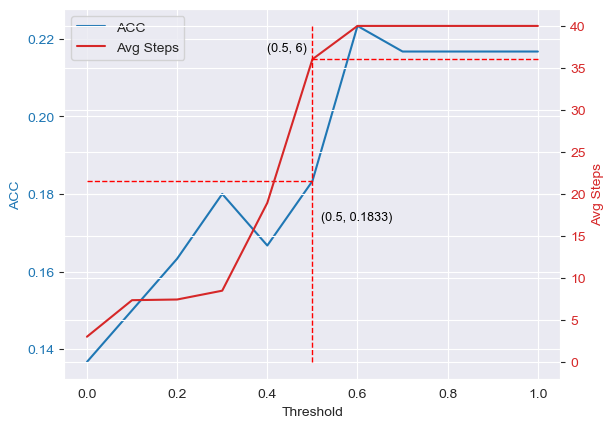

In [17]:
df_threshold_study_gpt4 = df_threshold_study[(df_threshold_study.llm == llm)]
df_threshold_study_gpt4_all = df_threshold_study_gpt4[df_threshold_study_gpt4.benchmark == benchmark]
th_casc_steps = df_threshold_study_gpt4_all['CASC_Avg_Cost'].to_numpy()
th_casc_acc = df_threshold_study_gpt4_all['CASC_ACC'].to_numpy()
th_casc_threshold = df_threshold_study_gpt4_all['threshold'].to_numpy()
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first line (ACC) with ax1
color = 'tab:blue'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('ACC', color=color)
line1, = ax1.plot(th_casc_threshold, th_casc_acc, color=color, label='ACC')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(y=th_casc_acc[5], xmin=0, xmax=0.5, color='red', linestyle='--', linewidth=1)
plt.annotate(f'({0.5}, {th_casc_acc[5]})', xy=(0.5, th_casc_acc[5]), 
                 xytext=(0.5 + 0.02, th_casc_acc[5]-0.01),
                 fontsize=9, color='black')
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Steps', color=color)
line2, = ax2.plot(th_casc_threshold, th_casc_steps, color=color, label='Avg Steps')
ax2.tick_params(axis='y', labelcolor=color)
plt.vlines(x=0.5, ymin=0, ymax=40, color='red', linestyle='--', linewidth=1)
plt.hlines(y=th_casc_steps[5], xmin=0.5, xmax=1, color='red', linestyle='--', linewidth=1)
plt.annotate(f'({0.5}, {6})', xy=(0.5, th_casc_steps[5]), 
                 xytext=(0.5 - 0.1, th_casc_steps[5]+1),
                 fontsize=9, color='black')
# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
fig.savefig('../src/experiment_collection/threshold_study_plot.jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

<Axes: >

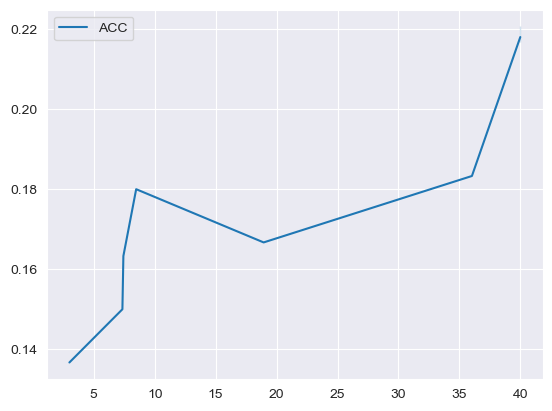

In [18]:
sns.lineplot( x=th_casc_steps, y=th_casc_acc, label='ACC', linestyle='-')

In [ ]:
th_casc_acc[5]
th_casc_steps[5]

# Stop algo study

In [ ]:
# result_buffer = {
#         'llm': [],
#         'benchmark':[],
#         'N': [],
#         'stop_algo':[],
#         'threshold': [],
#         'SC_ACC': [],
#         'ES_ACC': [],
#         'ASC_ACC': [],
#         'CASC_ACC': [],
#         'SC_Avg_Cost': [],
#         'ES_Avg_Cost': [],
#         'ASC_Avg_Cost': [],
#         'CASC_Avg_Cost': [],
#     }
# for stop_mechanism in config['stop_algo']:
#     for benchmark in config['benchmark']:
#         for llm in config['llm']:
#             df_in = get_data(df_with_features,benchmark=benchmark,llm=llm)
#             print(llm,benchmark)
#             print('df_size is ',len(df_in))
#             df_cs, _ = config['approximator'][0](df=df_in, feature_li=feature_li, coe=coe, intercept=intercept)
#             N= 3
#             threshold = 0.5
#             df_results, _ = CS_early_stopping(df=df_cs, threshold=threshold, N=N, stop_mechanism=stop_mechanism)
#             df_model_comp_dict = {
#                     'llm': llm,
#                     'benchmark':benchmark,
#                     'N': N,
#                     'stop_algo':stop_mechanism,
#                     'threshold': threshold,
#                     'SC_ACC': round(df_results.SC_correctness.sum() / len(df_results),4),
#                     'ES_ACC': round(df_results.ES_correctness.sum() / len(df_results),4),
#                     'ASC_ACC': round(df_results.asc_correctness.sum() / len(df_results),4),
#                     'CASC_ACC': round(df_results.CS_correctness.sum() / len(df_results),4),
#                     'SC_Avg_Cost': 40,
#                     'ES_Avg_Cost': round(df_results.ES_steps.mean(),2),
#                     'ASC_Avg_Cost': round(df_results.asc_steps.mean(),2),
#                     'CASC_Avg_Cost': round(df_results.CS_steps.mean(),2),
#                 }
#             for key,val in df_model_comp_dict.items():
#                 result_buffer[key].append(val)

In [ ]:
# df_stop_algo_study = pd.DataFrame(result_buffer)
# df_stop_algo_study.to_csv('stop_algo_study_table.csv',index=False)
df_N_study_2 = pd.read_csv('../src/experiment_collection/N_study_table_ConsistencyN.csv')
df_N_study = pd.read_csv('../src/experiment_collection/N_study_table.csv')

In [ ]:
llm = 'all'
benchmark = 'all'
print(llm,benchmark)
sc_step_results = []
df_step = get_data(df_with_features,benchmark=benchmark,llm = llm)
for row_idx in range(len(df_step)):
    sample_results = []
    for i in range(40):
        if Counter(df_step['CoT answers'].iloc[row_idx][:i+1]).most_common(1)[0][0] == df_step['correct answer'].iloc[row_idx]:
            sample_results.append(1)
        else:
            sample_results.append(0)
    sc_step_results.append(sample_results)
sc_step_results = np.array(sc_step_results)
sc_step_results = sc_step_results.sum(axis=0)/sc_step_results.shape[0]

df_N_study_gpt4 = df_N_study[(df_N_study.llm == llm)]
df_N_study_gpt4_all = df_N_study_gpt4[df_N_study_gpt4.benchmark == benchmark]
casc_steps = df_N_study_gpt4_all['CASC_Avg_Cost'].to_numpy().astype(np.int32)
casc_acc = df_N_study_gpt4_all['CASC_ACC'].to_numpy()
casc_step_results = np.zeros(40)
for i, idx in enumerate(casc_steps):
    casc_step_results[idx] = casc_acc[i]
casc_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],casc_step_results)

df_N_study_gpt4_2 = df_N_study_2[(df_N_study_2.llm == llm)]
df_N_study_gpt4_2_all = df_N_study_gpt4_2[df_N_study_gpt4_2.benchmark == benchmark]
casc_steps_2 = df_N_study_gpt4_2_all['CASC_Avg_Cost'].to_numpy().astype(np.int32)
casc_acc_2 = df_N_study_gpt4_2_all['CASC_ACC'].to_numpy()
casc_step_results_2 = np.zeros(40)
for i, idx in enumerate(casc_steps_2):
    casc_step_results_2[idx] = casc_acc_2[i]
casc_step_results_2 = replace_zeros_with_previous_nonzero(sc_step_results[0],casc_step_results_2)

es_steps = []
es_acc = []
for i in range(16):
    df_es_step = calculate_ES_correctness(df_step,i+1)
    es_acc.append(round(df_es_step.ES_correctness.sum() / len(df_es_step),4))
    es_steps.append(df_es_step.ES_steps.mean().astype(np.int32))
es_step_results = np.zeros(40)
for i, idx in enumerate(es_steps):
    es_step_results[idx] = es_acc[i]
es_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],es_step_results)

asc_steps = []
asc_acc = []
for i in range(75,101):
    df_asc_step = calculate_ASC_correctness(df_step,i*0.01)
    asc_acc.append(round(df_asc_step.asc_correctness.sum() / len(df_asc_step),4))
    asc_steps.append(df_asc_step.asc_steps.mean().astype(np.int32))
asc_step_results = np.zeros(40)
for i, idx in enumerate(asc_steps):
    asc_step_results[idx-1] = asc_acc[i]
asc_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],asc_step_results)

step_study_plot_dict = {
    'Steps': np.arange(40)[1:],
    'SC': sc_step_results[1:],
    'ES': es_step_results[1:],
    'ASC': asc_step_results[1:],
    'CASC_PositiveN':casc_step_results[1:],
    'CASC_ConsistencyN':casc_step_results_2[1:]
}



plt.figure()
# sns.lineplot(data=step_study_plot_dict, x='Steps', y='SC', label='SC', linestyle='-')
# sns.lineplot(data=step_study_plot_dict, x='Steps', y='ES', label='ES', linestyle='-')
# sns.lineplot(data=step_study_plot_dict, x='Steps', y='ASC', label='ASC', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='CASC_PositiveN', label='CASC_PositiveN', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='CASC_ConsistencyN', label='CASC_ConsistencyN', linestyle='-')

# Set the x and y axis labels
plt.xlabel('Steps')
plt.ylabel('ACC')

# Find the intersection point
x_intercept = None
for i in range(len(step_study_plot_dict['Steps']) - 1):
    if step_study_plot_dict['CASC_PositiveN'][i] < sc_step_results.max() <= step_study_plot_dict['CASC_PositiveN'][i+1]:
        x_intercept = step_study_plot_dict['Steps'][i]+1
        break

# Add the horizontal line (red line)
plt.hlines(y=0.545, xmin=x_intercept, xmax=40, color='red', linestyle='--', linewidth=1)

# Add the vertical line at the intersection point
if x_intercept is not None:
    plt.vlines(x=x_intercept, ymin=sc_step_results.min(), ymax=0.545, color='red', linestyle='--', linewidth=1)
    plt.annotate(f'({x_intercept}, {0.545})', xy=(x_intercept, 0.545), 
                 xytext=(x_intercept - 5.7, 0.545),
                 fontsize=9, color='black')

# Display the plot
plt.legend()
plt.savefig('../src/experiment_collection/stop_algo_study_plot.jpg', dpi=300, bbox_inches='tight')
plt.plot()